In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
file_path = '/Users/claudiomema/Documents/College/Penn State/DAAN 881/war_territ_death_fixed_data.csv'
data = pd.read_csv(file_path)

In [37]:
# Display the first few rows to understand the data structure
data.head()

,ID,Country,Latitude,Longitude,Page,Battle,Year,Participants,War,Winner,...,type_of_conflict,battle_location,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,gwno_battle,region,version
0,1stDragasani1821,GREECE,44.663180,24.260871,"CLODFELTER, P191",DRAGASANI,1821,[],GREEK WAR OF INDEPENDENCE,GREEK REBELS,...,3.255814,AFGHANISTAN,606.069767,365,NaN,594.375,606.069767,700,3.139535,24.1
1,1stGiurgevo1811,ROMANIA,43.897701,25.927498,"CLODFELTER, P190",GIURGEVO,1811,[],RUSSO-TURKISH WARS,OTTOMAN EMPIRE,...,3.255814,AFGHANISTAN,606.069767,365,NaN,594.375,606.069767,700,3.139535,24.1
2,2ndBreslau1757,POLAND,51.107885,17.038538,"CLODFELTER, P80",BRESLAU,1757,[],SEVEN YEARS WAR,PRUSSIA,...,3.255814,AFGHANISTAN,606.069767,365,NaN,594.375,606.069767,700,3.139535,24.1
3,2ndGiurgevo1811,ROMANIA,43.897701,25.927498,HUTCHINSON,GIURGEVO,1811,[],RUSSO-TURKISH WARS,RUSSIA,...,3.255814,AFGHANISTAN,606.069767,365,NaN,594.375,606.069767,700,3.139535,24.1
4,2ndSchweidnitz1757,POLAND,50.849843,16.475679,"CLODFELTER, P80",SCHWEIDNITZ,1757,[],SEVEN YEARS' WAR,PRUSSIA,...,3.255814,AFGHANISTAN,606.069767,365,NaN,594.375,606.069767,700,3.139535,24.1


In [38]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Print the numerical columns
print("Numerical columns in the dataset:")
print(numerical_columns)

Numerical columns in the dataset:
['Latitude', 'Longitude', 'Lehmann Zhukov Scale', 'Minor', 'year_x', 'conflict_id', 'side_a_id', 'incompatibility', 'year_y', 'bd_best', 'bd_low', 'bd_high', 'type_of_conflict', 'gwno_a', 'gwno_b', 'gwno_b_2nd', 'gwno_loc', 'region', 'version']


In [39]:
# Step 2: Ensure columns are numeric (handle non-numeric values)
# Convert columns to numeric, coercing errors so non-numeric values become NaN
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [40]:
# Step 3: IQR Method to Identify and Treat Outliers
def iqr_outliers_treatment(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Treating outliers by capping them to lower or upper bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df[column]

In [41]:
# Store original data for comparison
original_data = pd.read_csv(file_path)

# Apply IQR treatment for each numerical column
for col in numerical_columns:
    data[col] = iqr_outliers_treatment(data, col)

In [42]:
# Step 4: Verification - Summary Statistics Before and After Cleaning
def display_summary_stats(df1, df2, columns):
    print("\nSummary Statistics (Before Cleaning):\n")
    print(df1[columns].describe())
    print("\nSummary Statistics (After Cleaning):\n")
    print(df2[columns].describe())

# Display summary statistics
display_summary_stats(original_data, data, numerical_columns)


Summary Statistics (Before Cleaning):

          Latitude    Longitude  Lehmann Zhukov Scale   Minor       year_x  \
count  9102.000000  9102.000000           9102.000000  9102.0  9102.000000   
mean     33.927868    15.425345              2.248099     1.0  1896.691756   
std      19.801384    60.428662              0.776563     0.0    10.703673   
min     -54.281505  -597.000000              1.000000     1.0  1818.000000   
25%      28.682892    -2.814784              2.000000     1.0  1896.691756   
50%      38.493516    14.268120              2.248099     1.0  1896.691756   
75%      47.421102    40.105147              2.248099     1.0  1896.691756   
max      77.874972   344.000000              6.000000     1.0  1991.000000   

        conflict_id    side_a_id  incompatibility       year_y       bd_best  \
count   9102.000000  9102.000000      9102.000000  9102.000000   9102.000000   
mean     579.744186   110.883721         1.604651  1994.348837   3020.069767   
std      115.3105

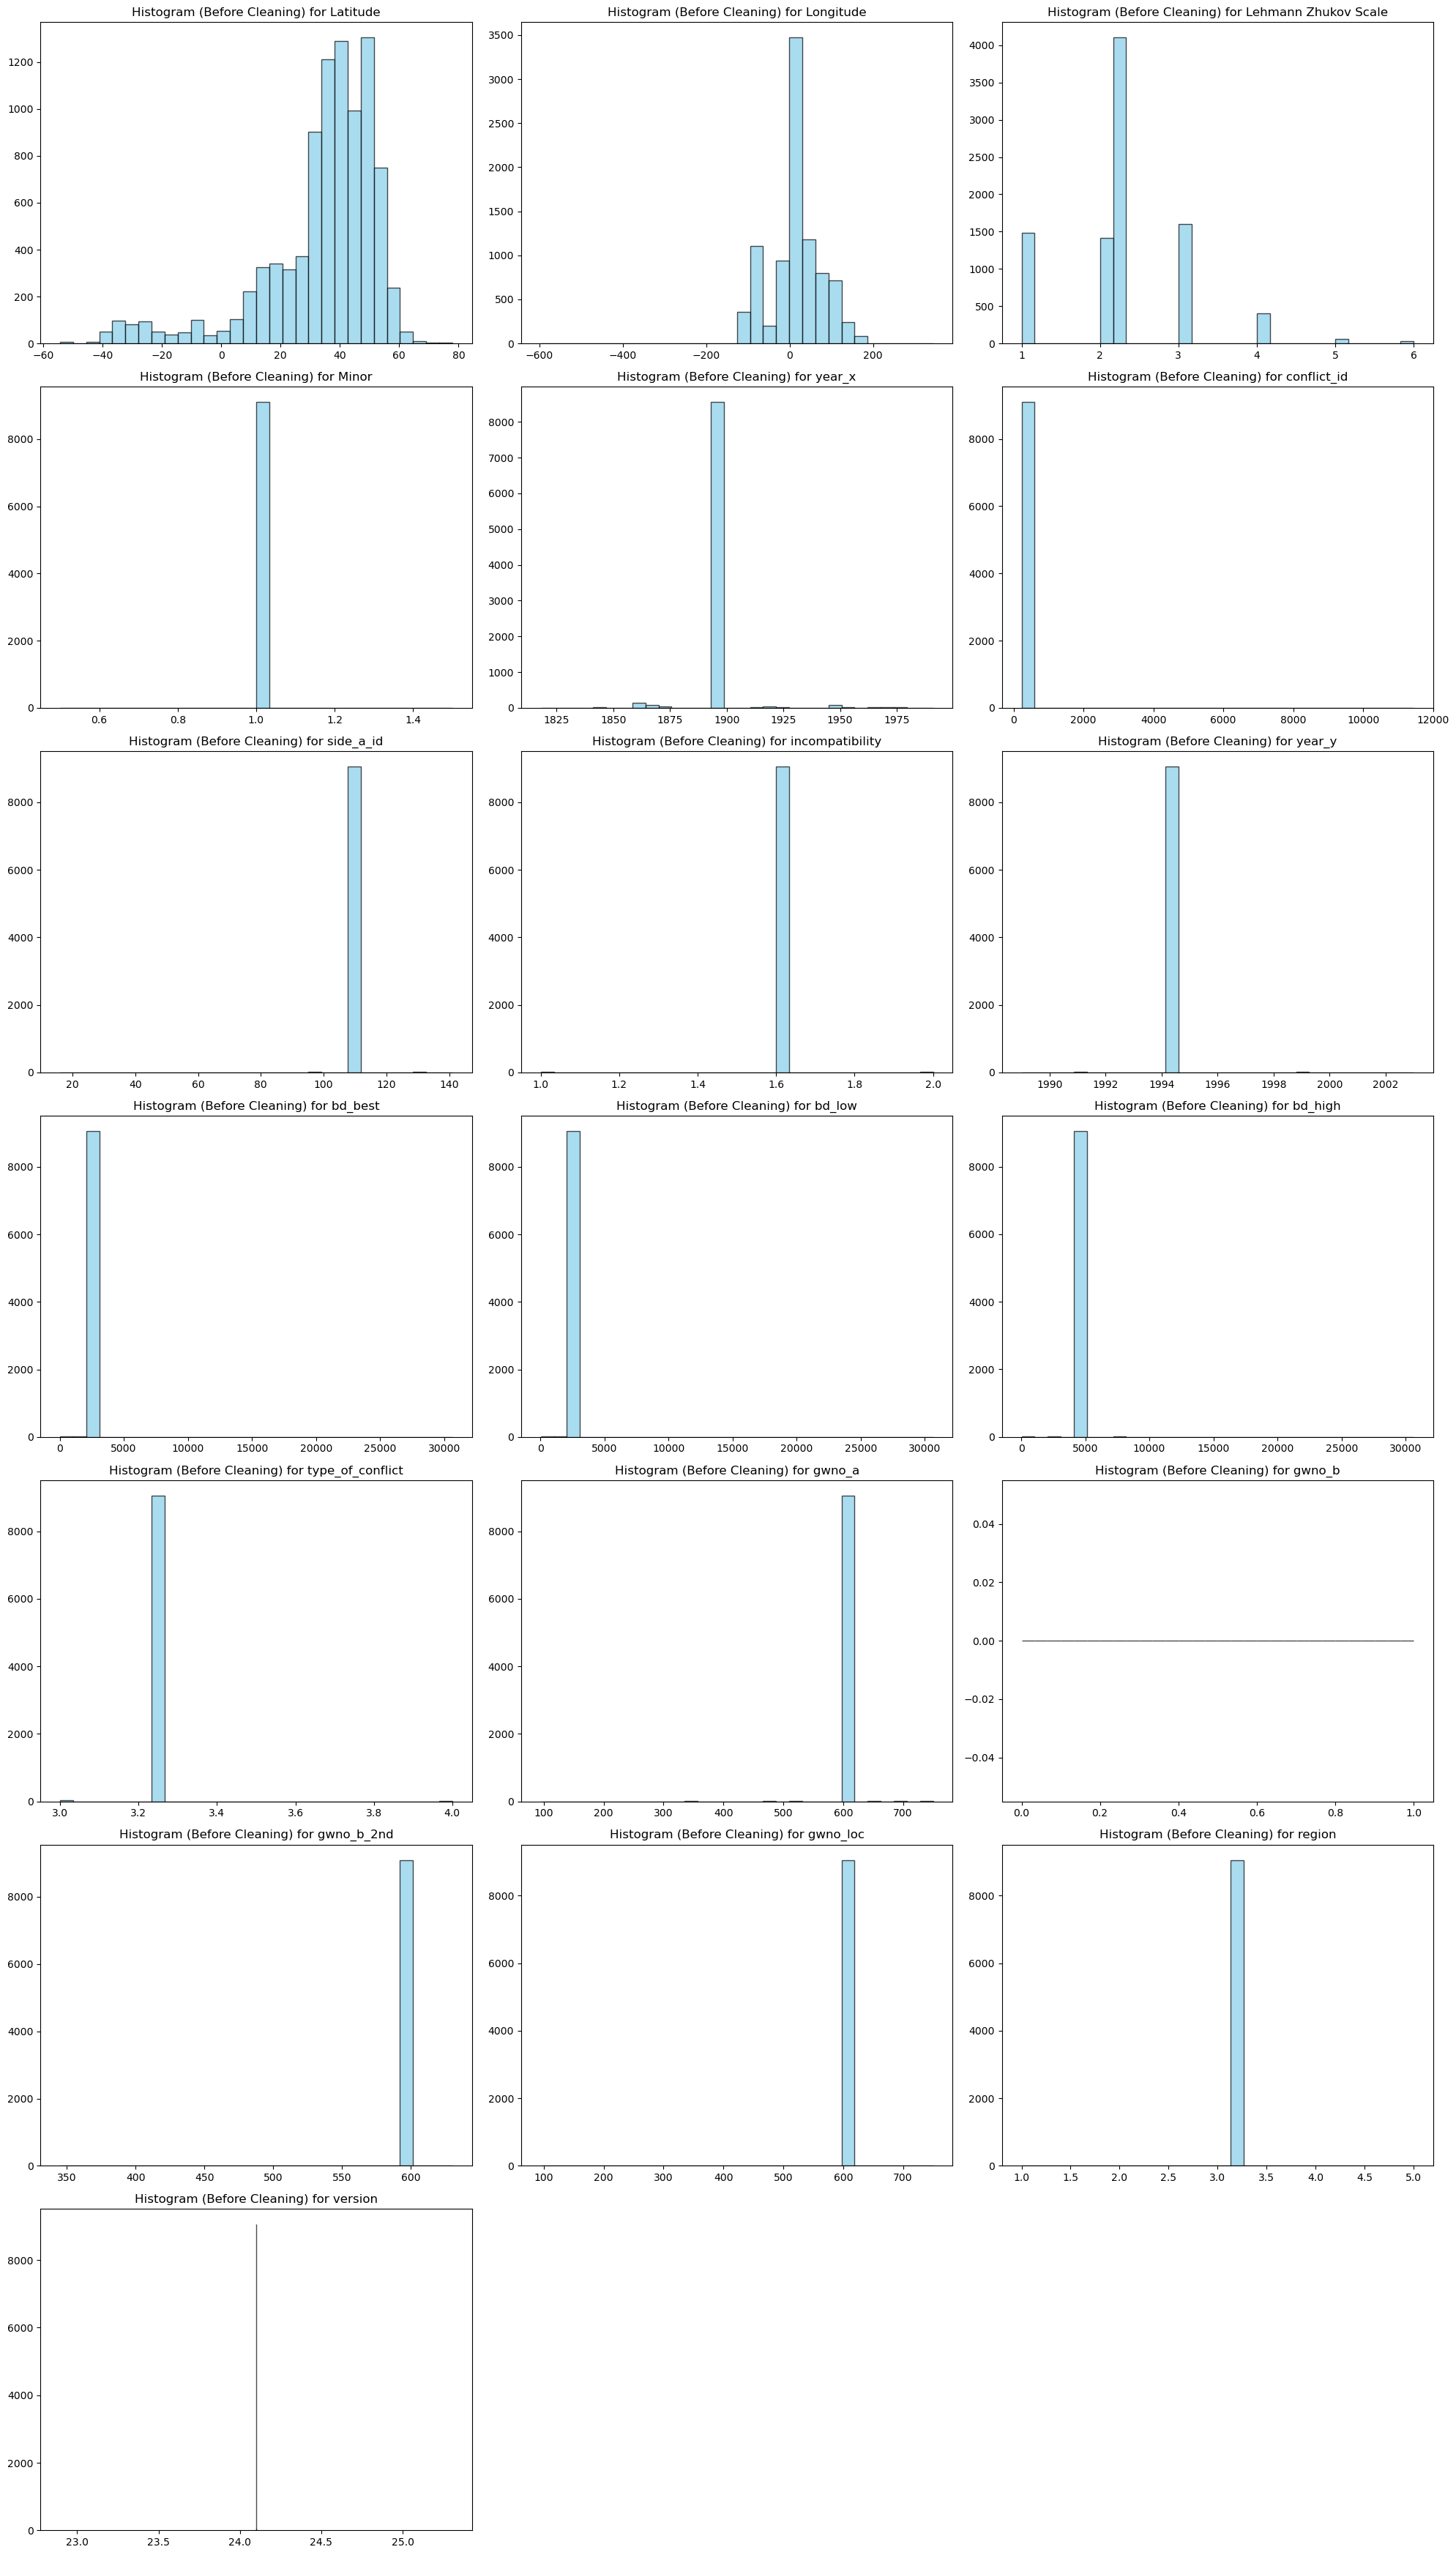

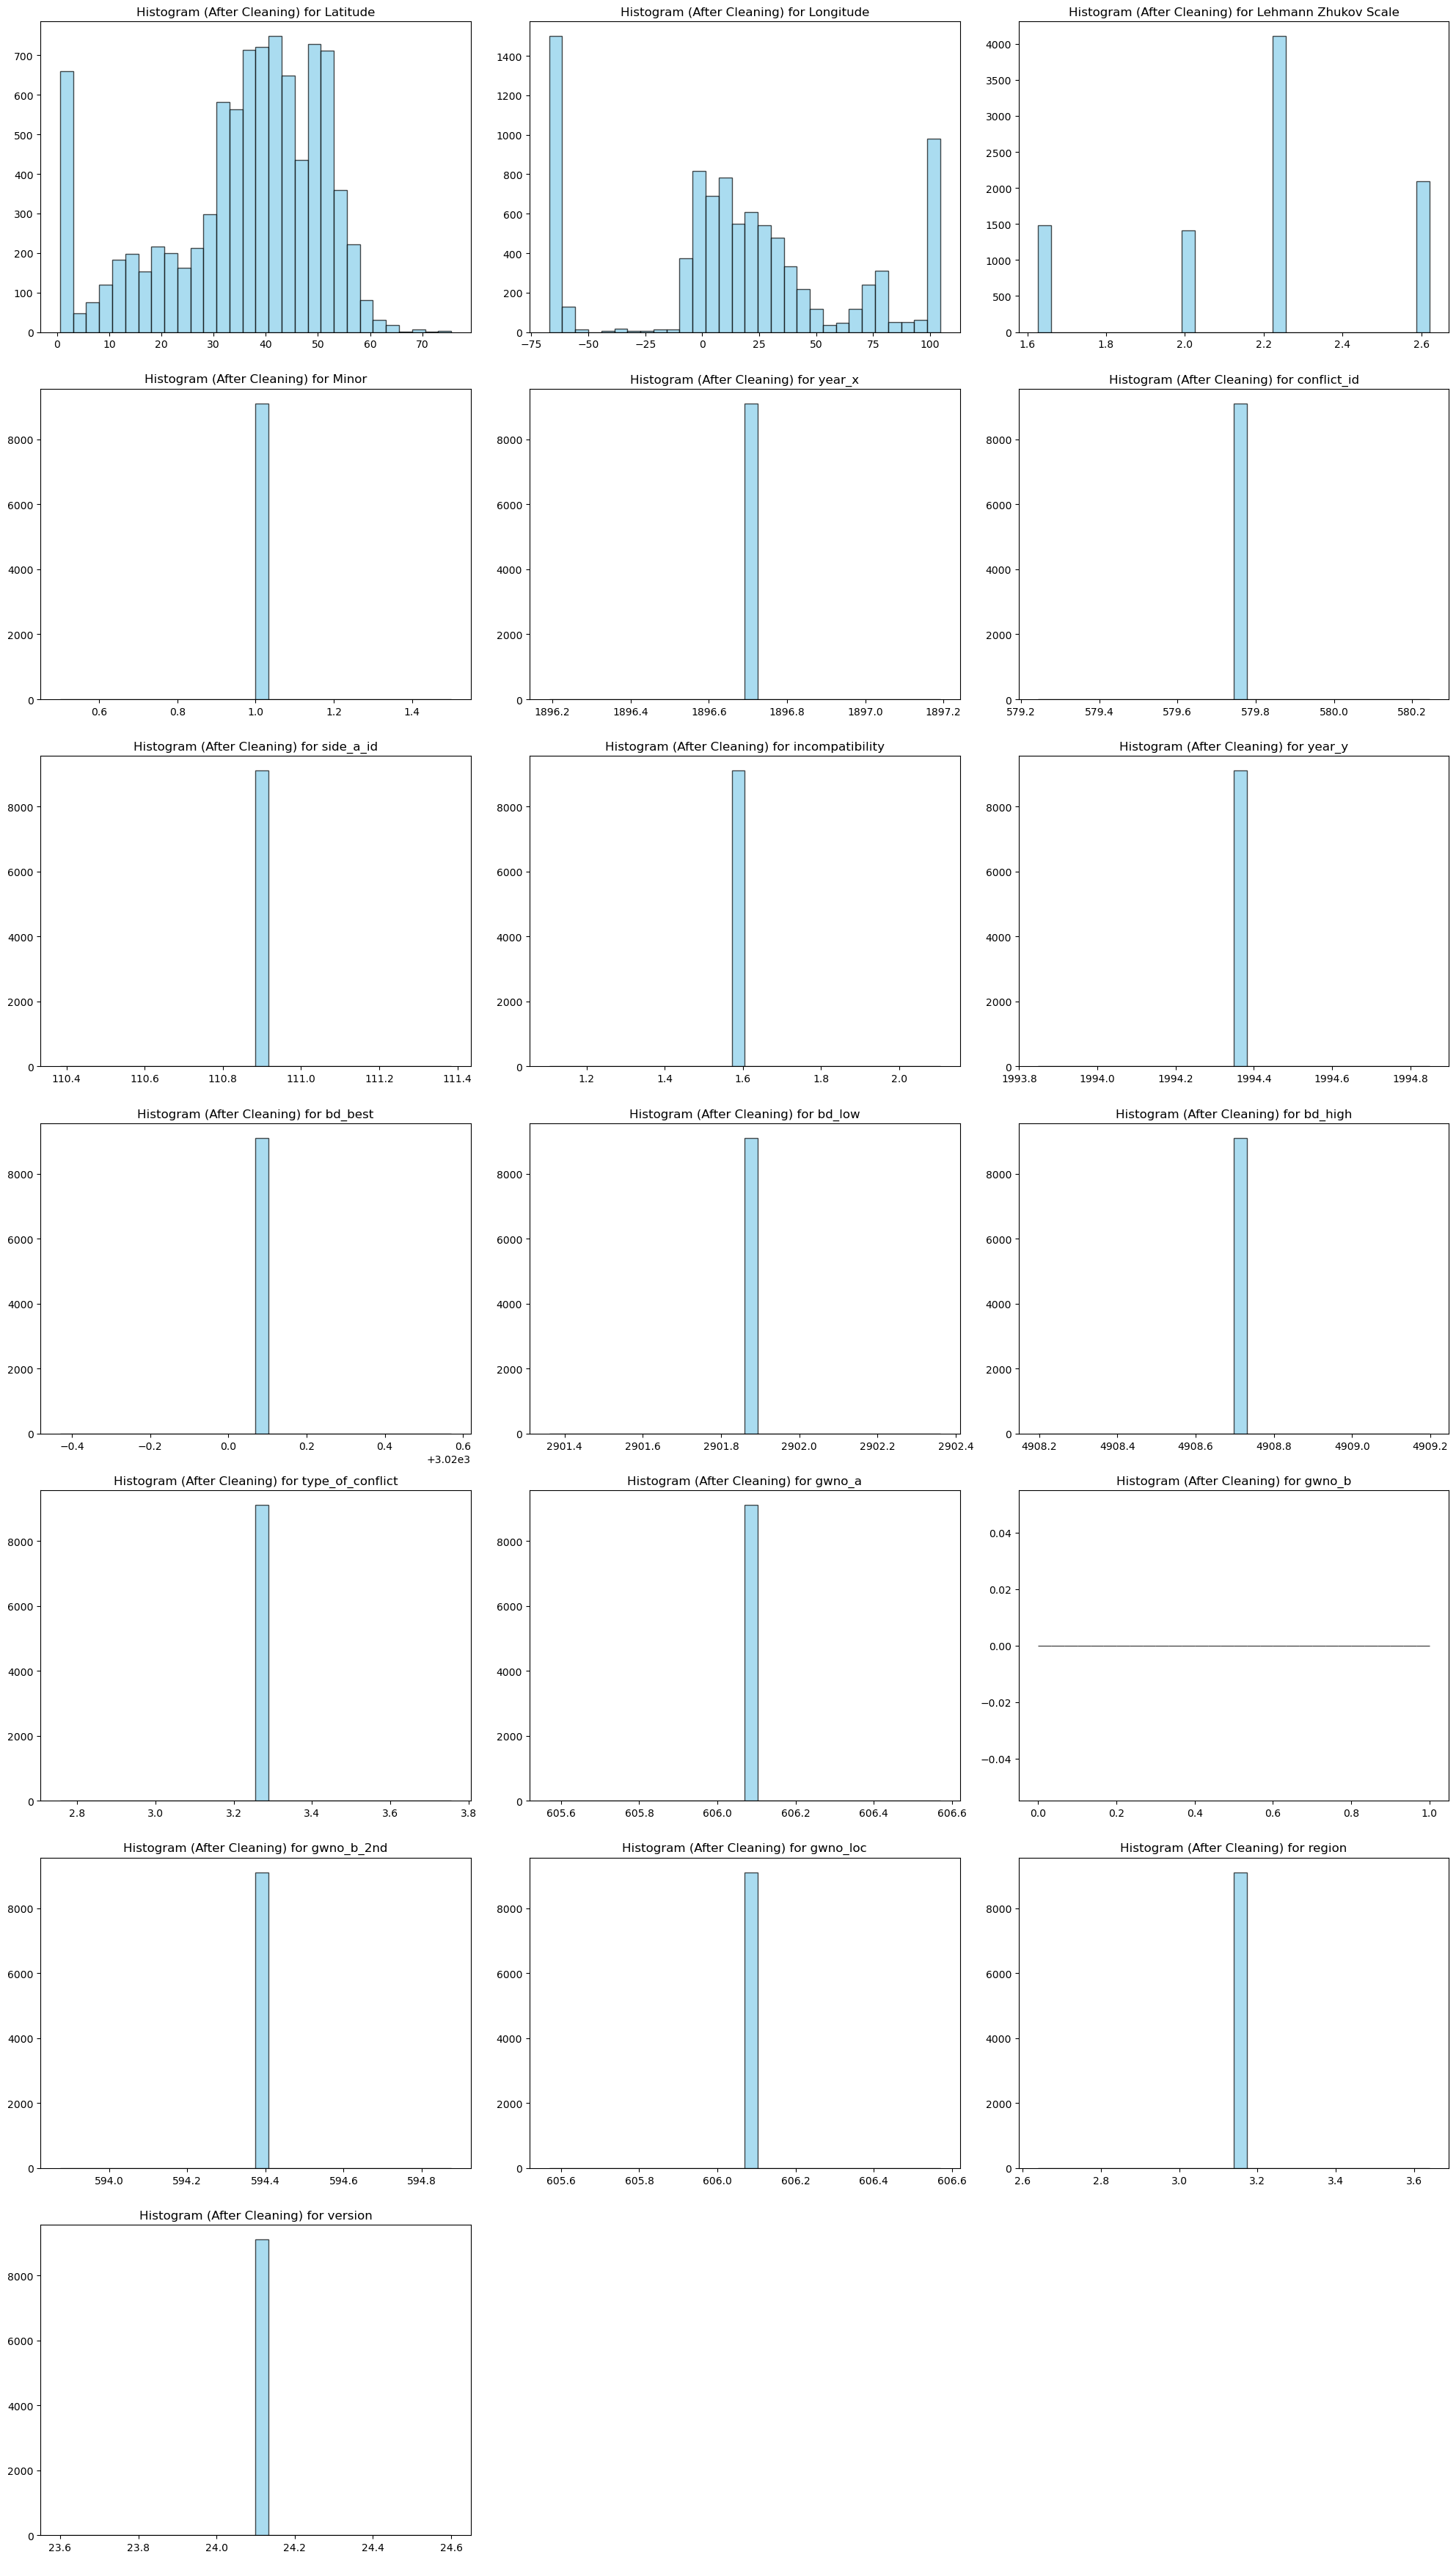

In [44]:
# Step 5: Verification - Histograms Before and After Cleaning
def plot_histograms(df, columns, title):
    # Determine the number of rows and columns for subplots
    num_columns = len(columns)
    num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate rows for a maximum of 3 columns per row

    plt.figure(figsize=(20, 5 * num_rows))
    for i, col in enumerate(columns):
        plt.subplot(num_rows, 3, i + 1)  # Adjust subplot layout
        plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'{title} for {col}')
    plt.tight_layout()
    plt.show()

# Plot histograms for before and after cleaning
plot_histograms(original_data, numerical_columns, 'Histogram (Before Cleaning)')
plot_histograms(data, numerical_columns, 'Histogram (After Cleaning)')

In [45]:
# Step 6: Verification - Value Counts for Year Columns
def value_counts_check(df1, df2, columns):
    for col in columns:
        print(f"\nValue Counts for {col} (Before Cleaning):")
        print(df1[col].value_counts().head())
        print(f"\nValue Counts for {col} (After Cleaning):")
        print(df2[col].value_counts().head())

# Check value counts for 'year_x' and 'year_y'
value_counts_check(original_data, data, ['year_x', 'year_y'])


Value Counts for year_x (Before Cleaning):
year_x
1896.691756    8544
1863.000000      94
1866.000000      71
1870.000000      47
1948.000000      40
Name: count, dtype: int64

Value Counts for year_x (After Cleaning):
year_x
1896.691756    9102
Name: count, dtype: int64

Value Counts for year_y (Before Cleaning):
year_y
1994.348837    9059
1991.000000      11
1999.000000       8
2001.000000       7
1990.000000       6
Name: count, dtype: int64

Value Counts for year_y (After Cleaning):
year_y
1994.348837    9102
Name: count, dtype: int64


In [46]:
# Step 7: Verification - Number of Rows Before and After Cleaning
print(f"\nNumber of rows before cleaning: {len(original_data)}")
print(f"Number of rows after cleaning: {len(data)}")

# Step 8: Verification - Check for NaN Values After Cleaning
print("\nNaN Values After Cleaning:")
print(data.isnull().sum())


Number of rows before cleaning: 9102
Number of rows after cleaning: 9102

NaN Values After Cleaning:
ID                                  0
Country                             0
Latitude                            0
Longitude                           0
Page                                0
Battle                              0
Year                                0
Participants                        0
War                                 0
Winner                              0
Loser                               0
Participant 1                       0
Participant 2                       0
Lehmann Zhukov Scale                0
Theatre                             0
Polygon                             0
Massacre                            0
Alternative Sources Consulted       0
Infered Scale                       0
Minor                               0
year_x                              0
country_gaining                     0
iso3c_gaining                       0
country_losing          

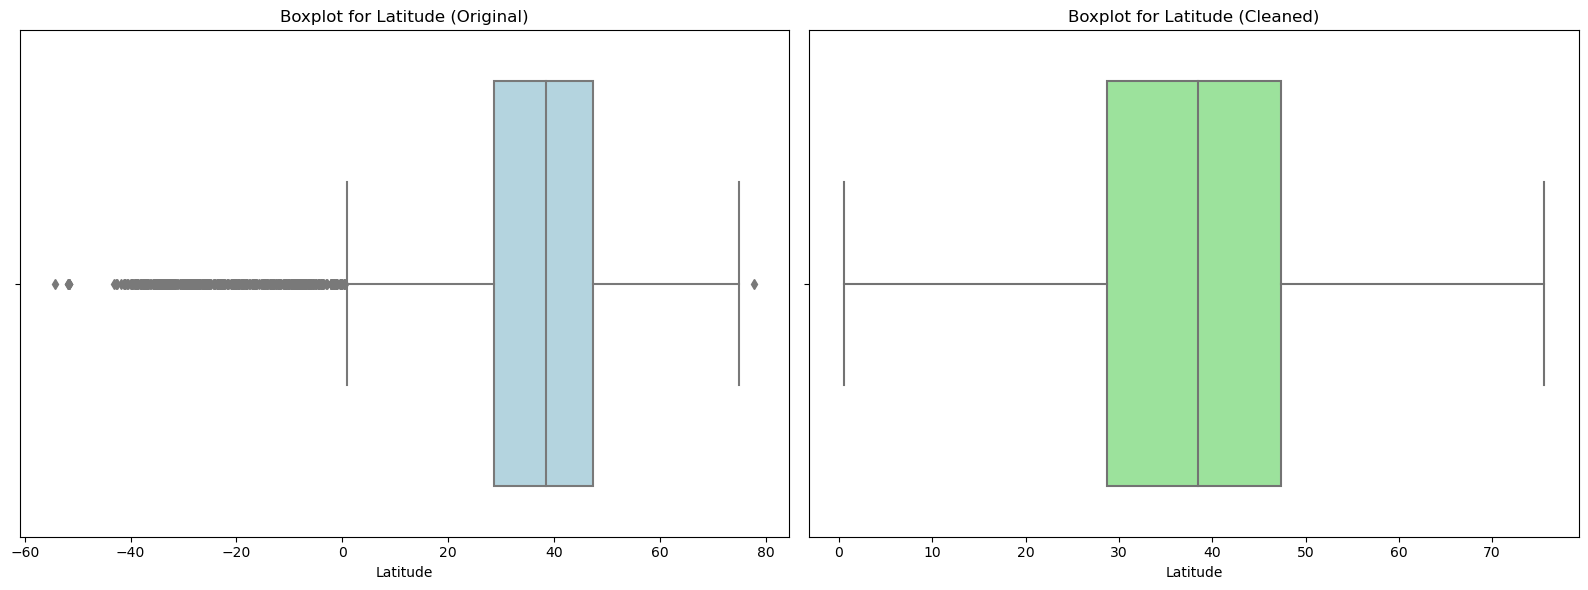

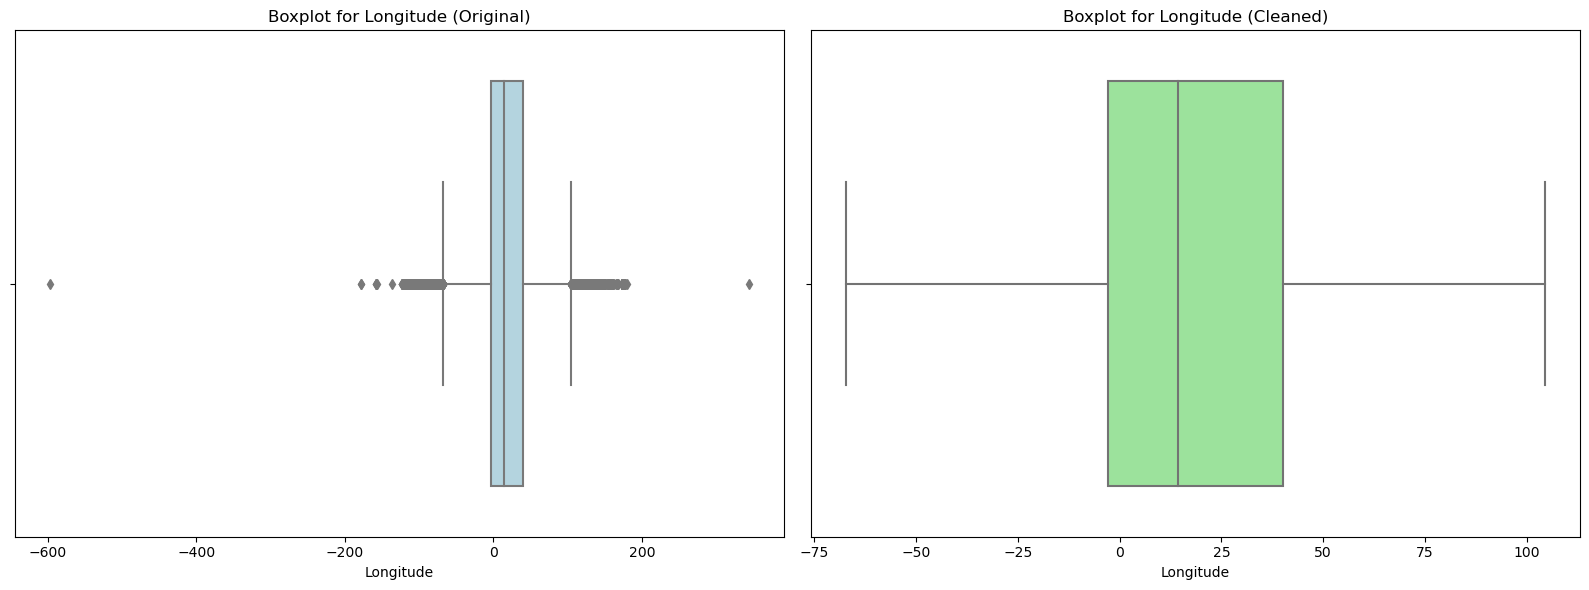

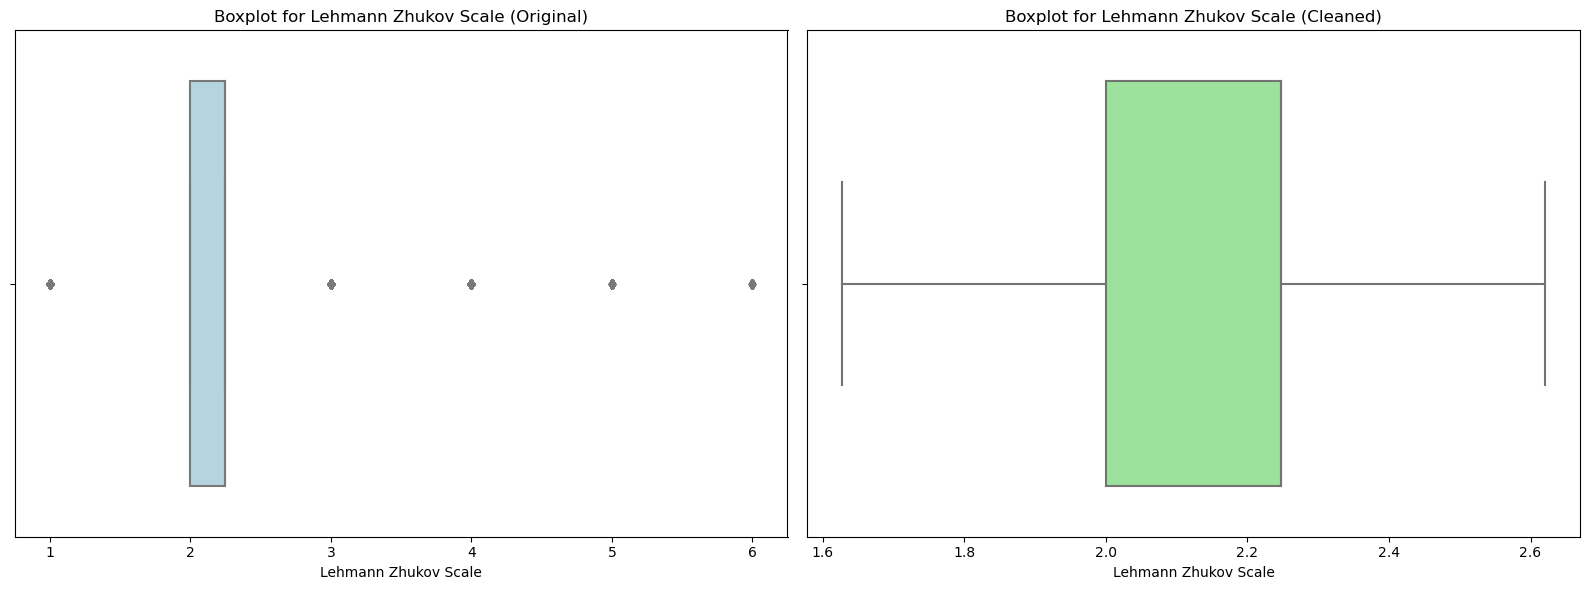

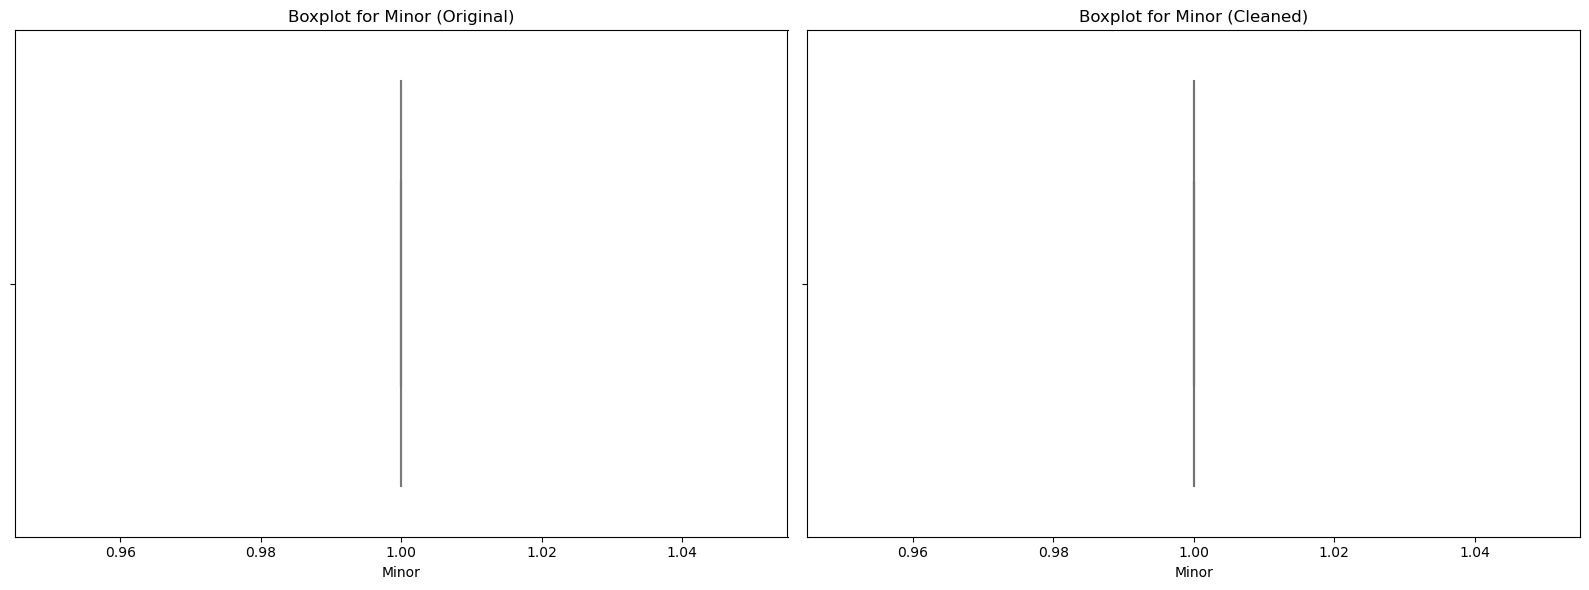

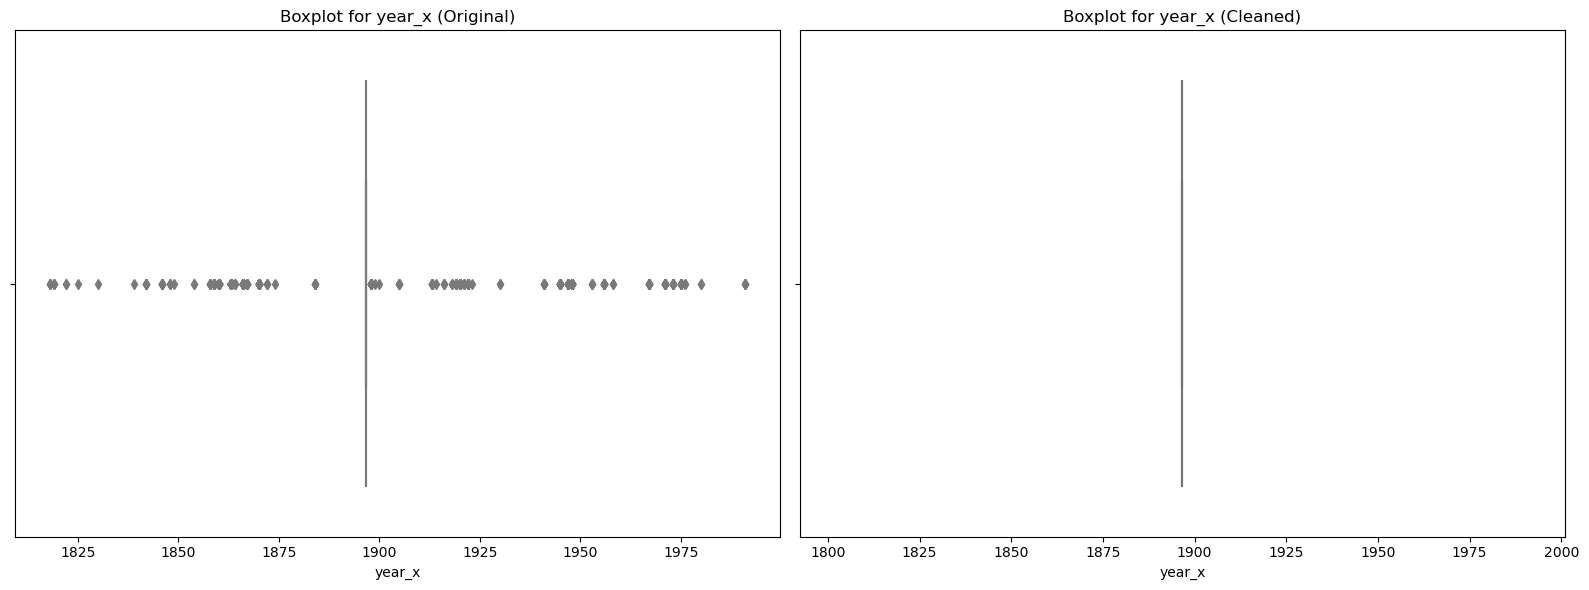

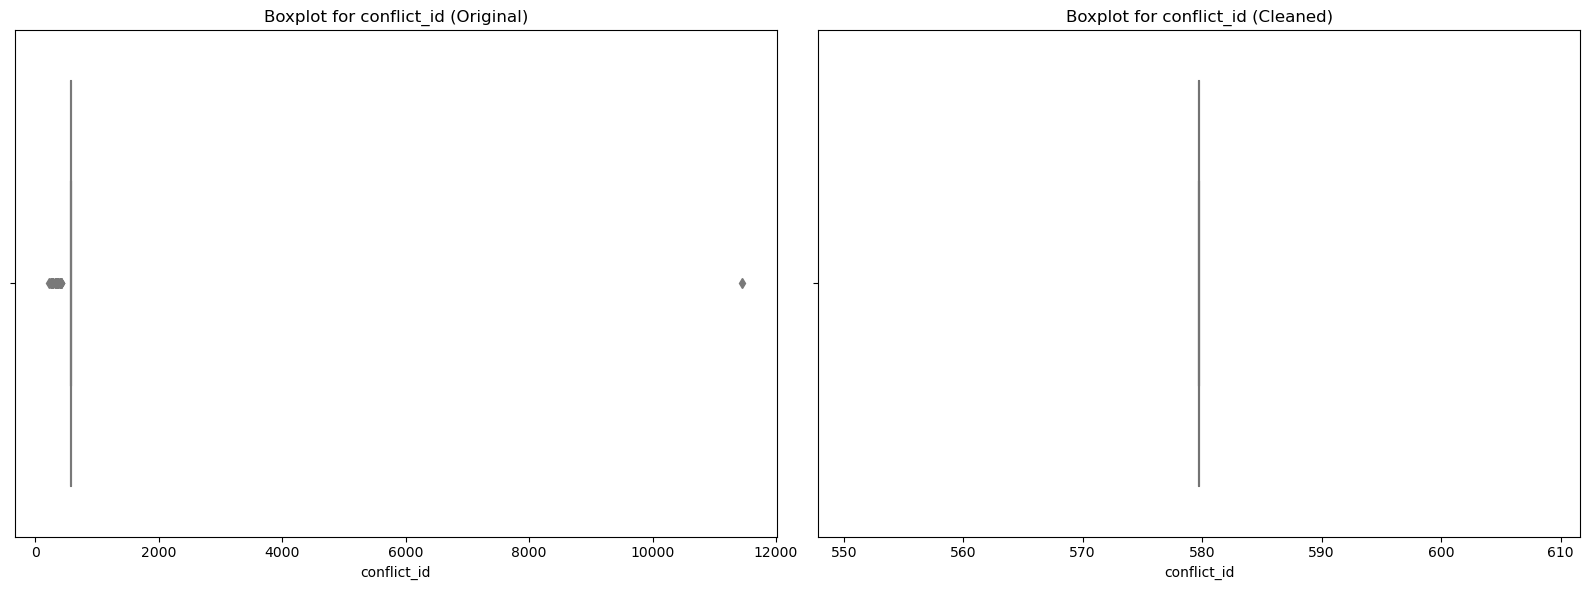

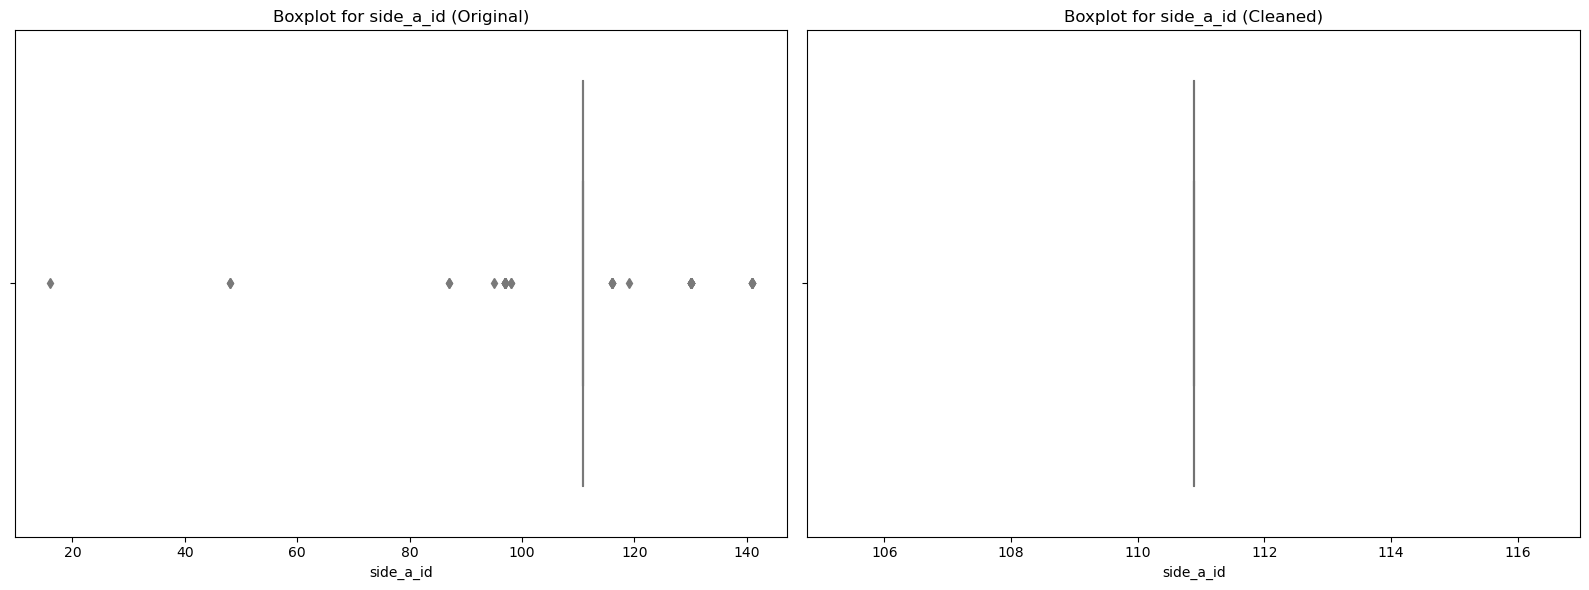

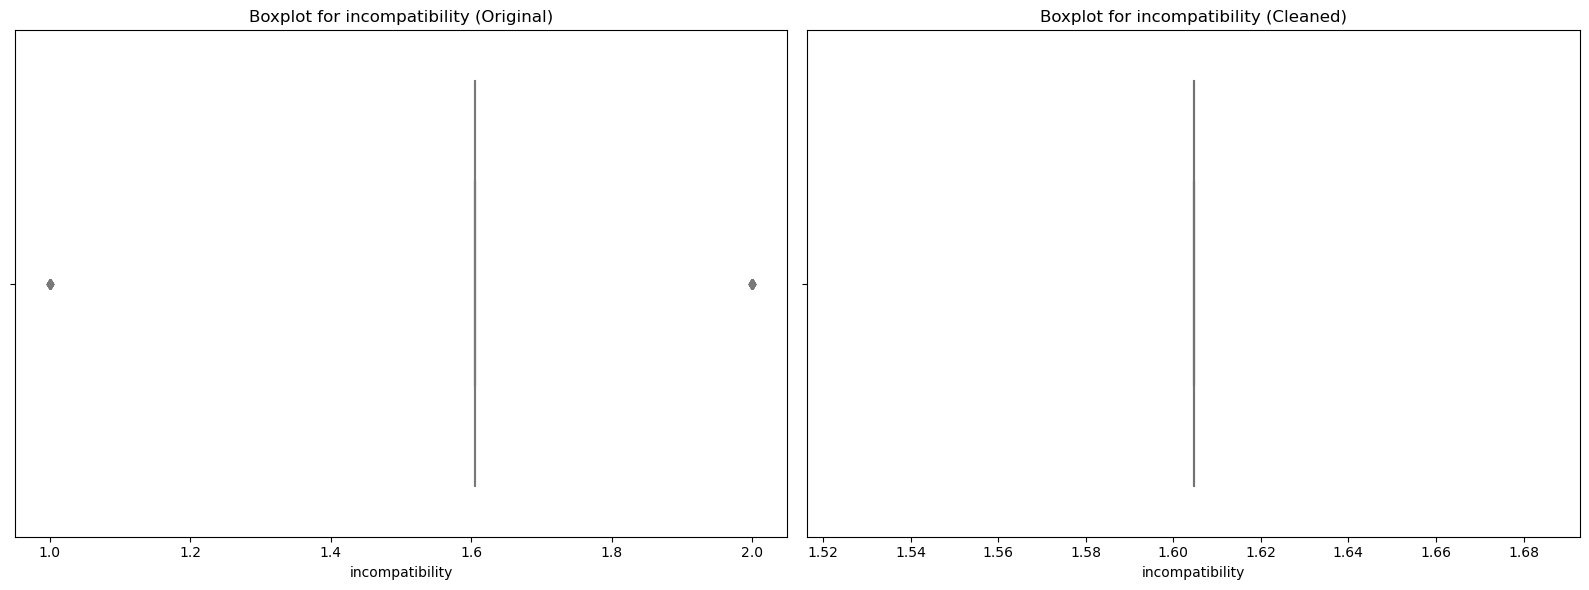

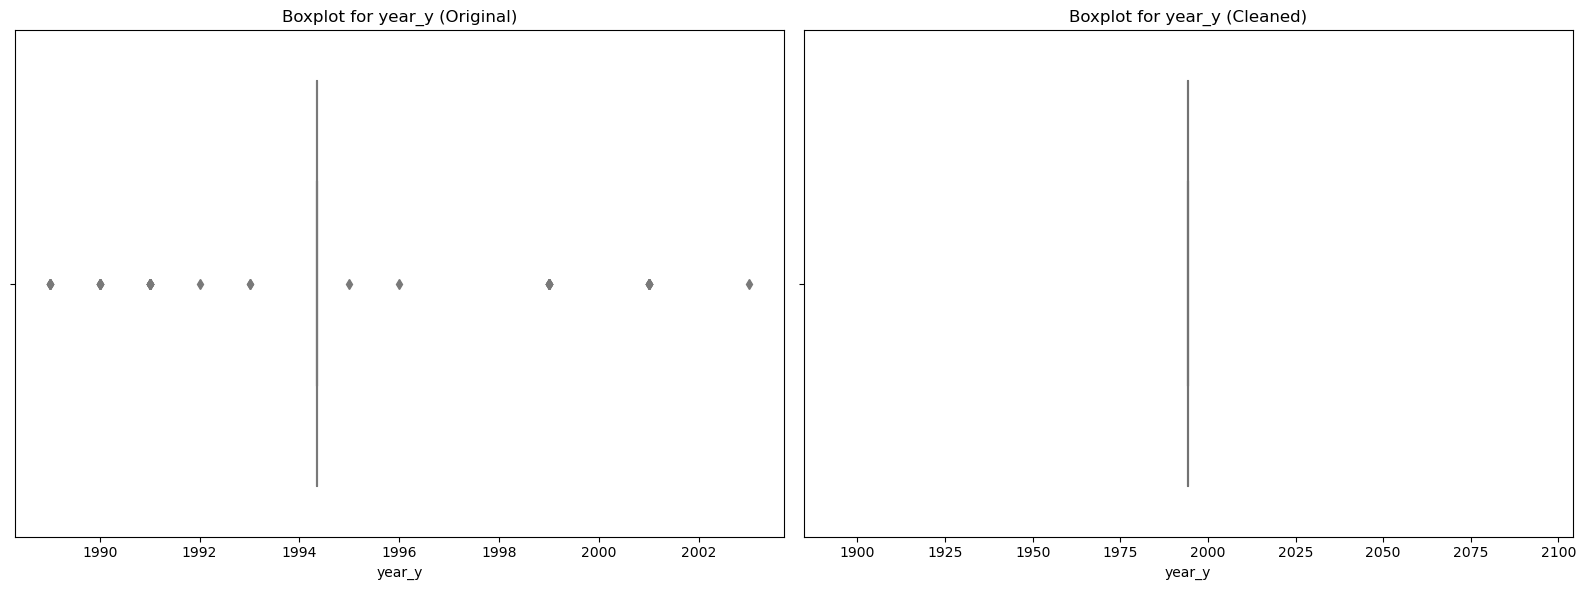

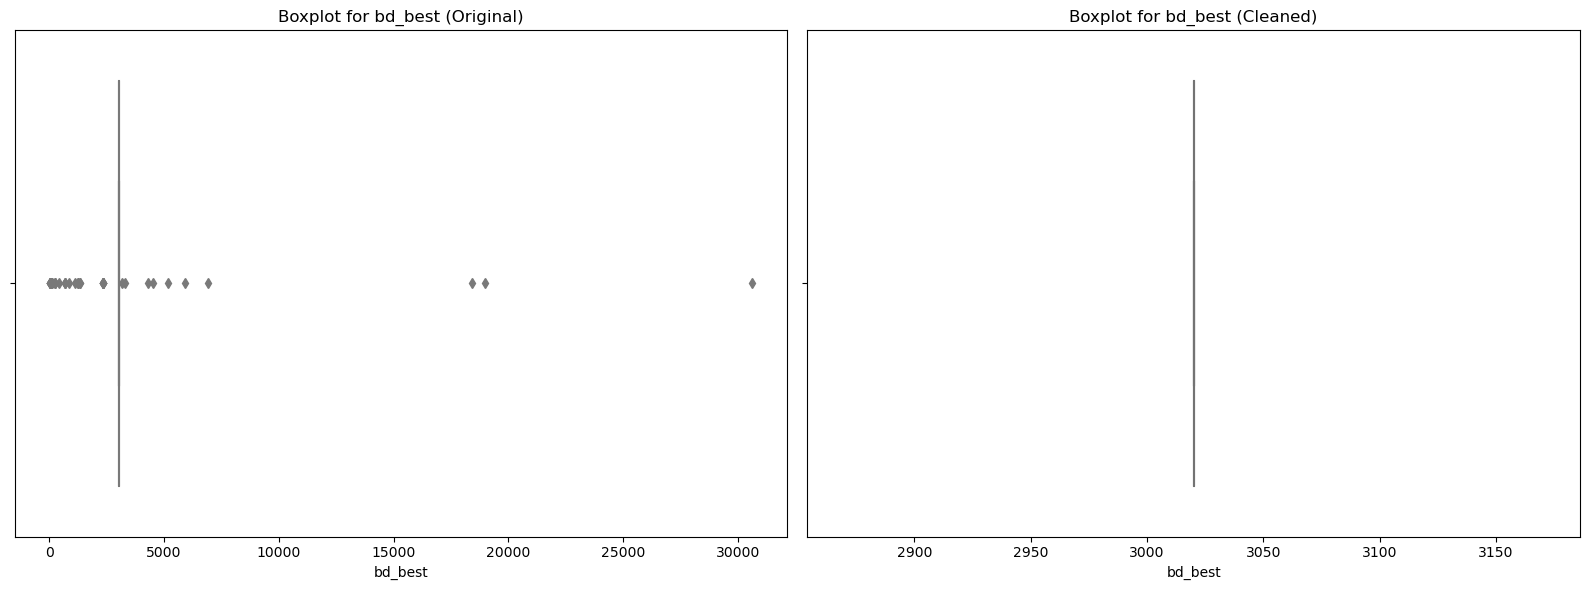

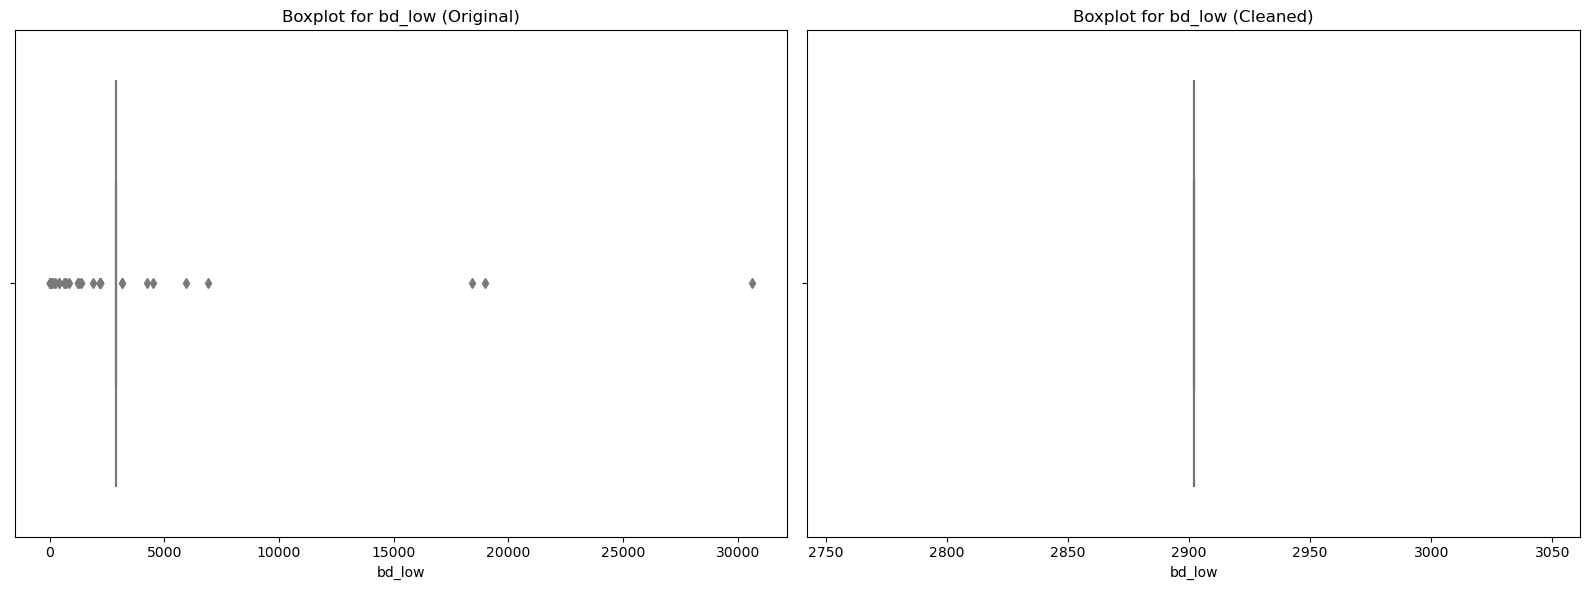

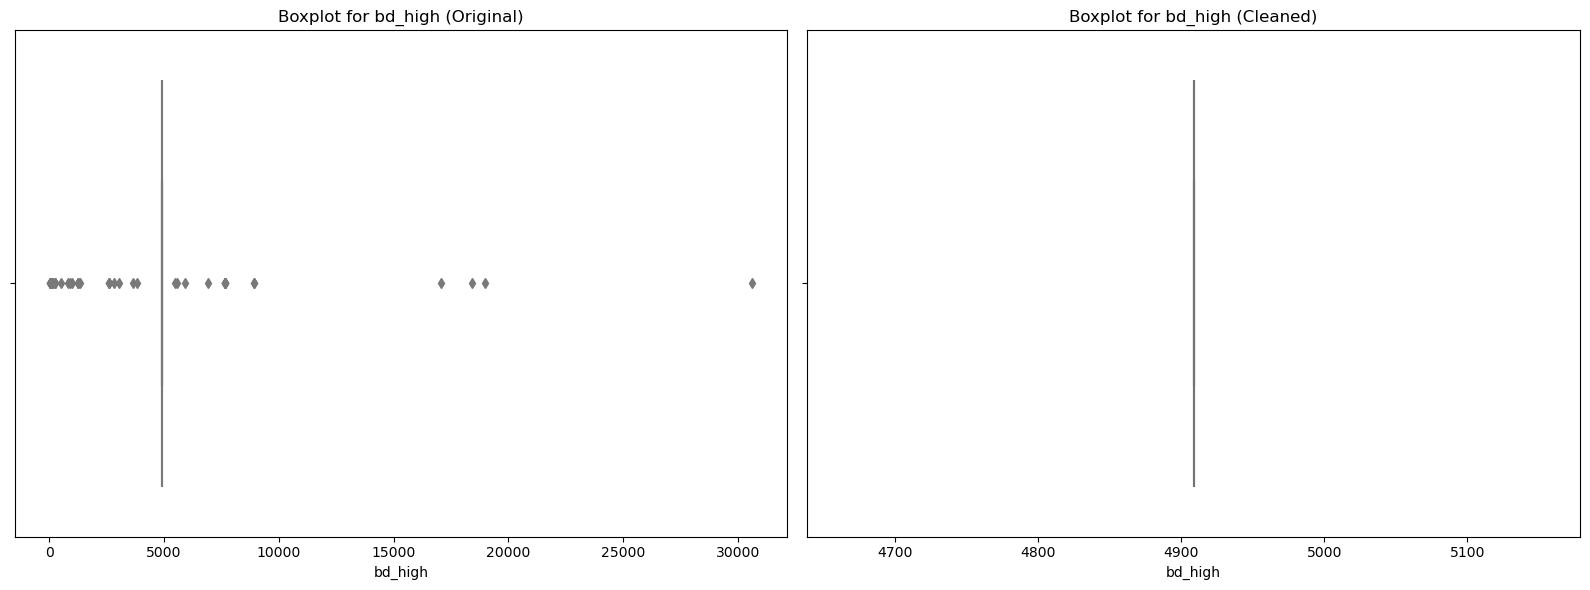

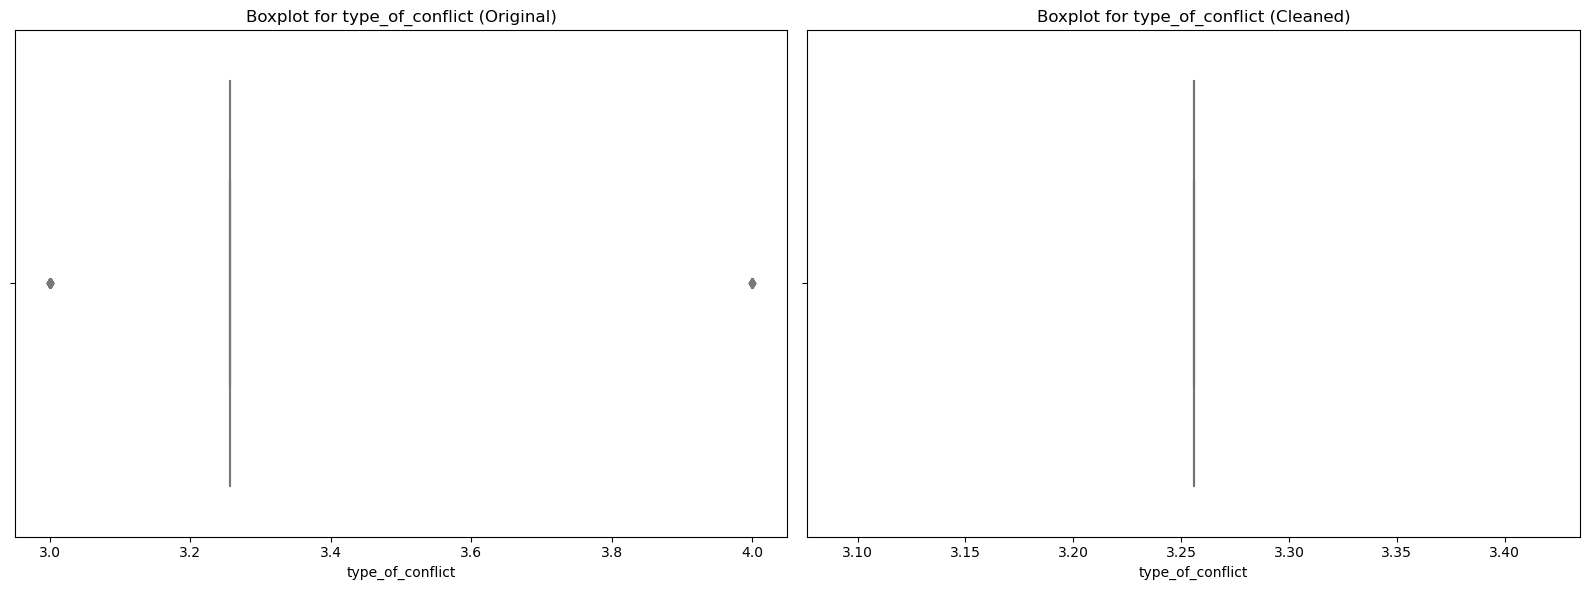

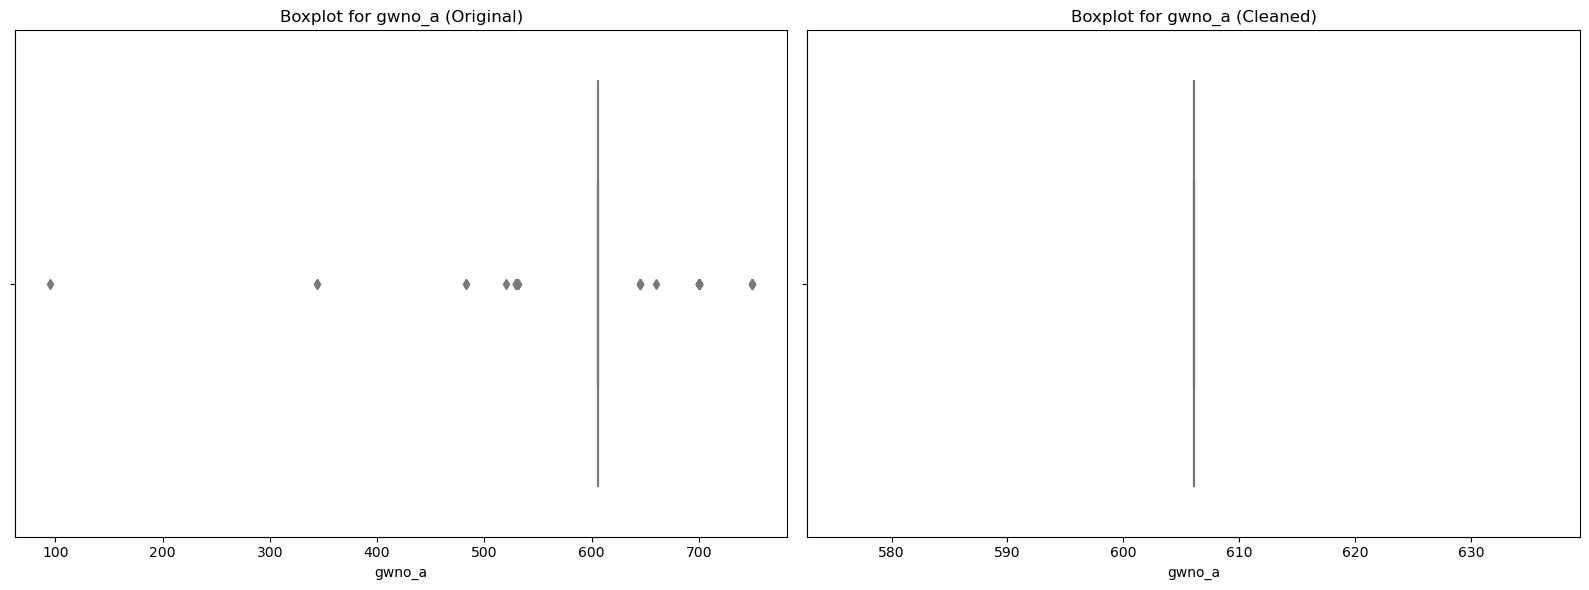

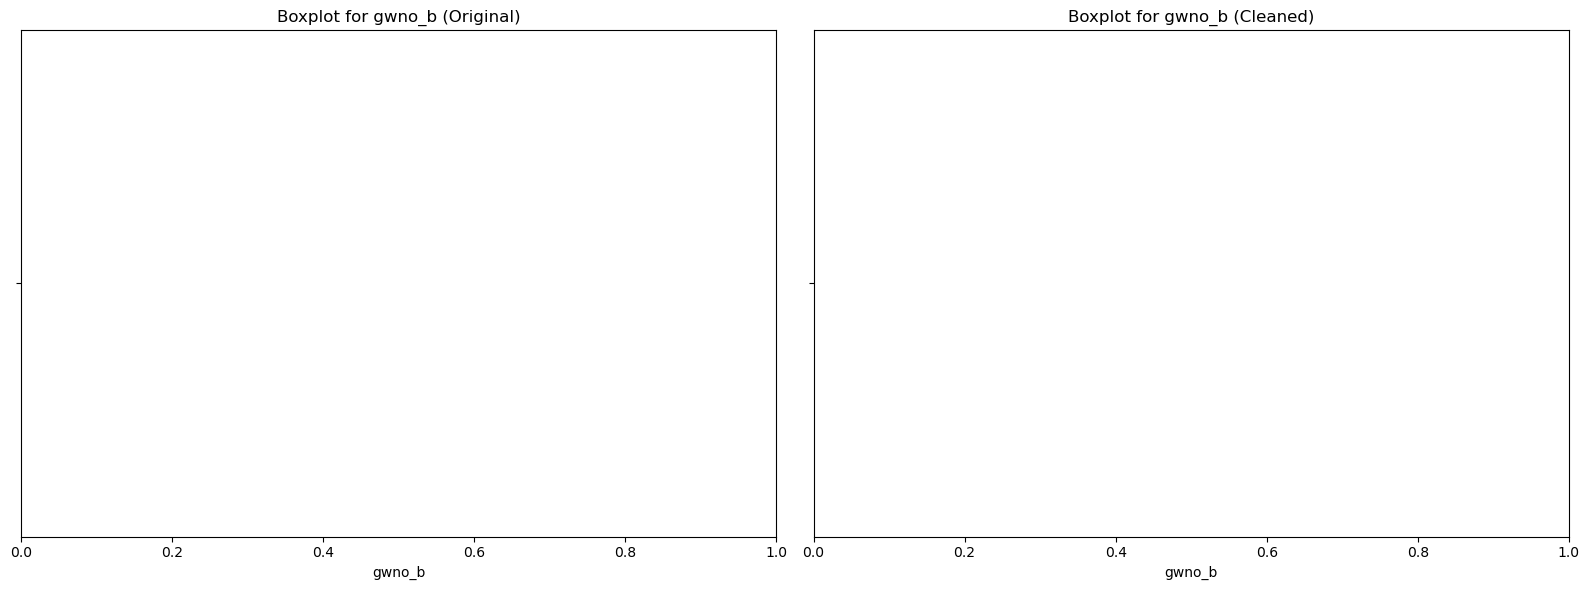

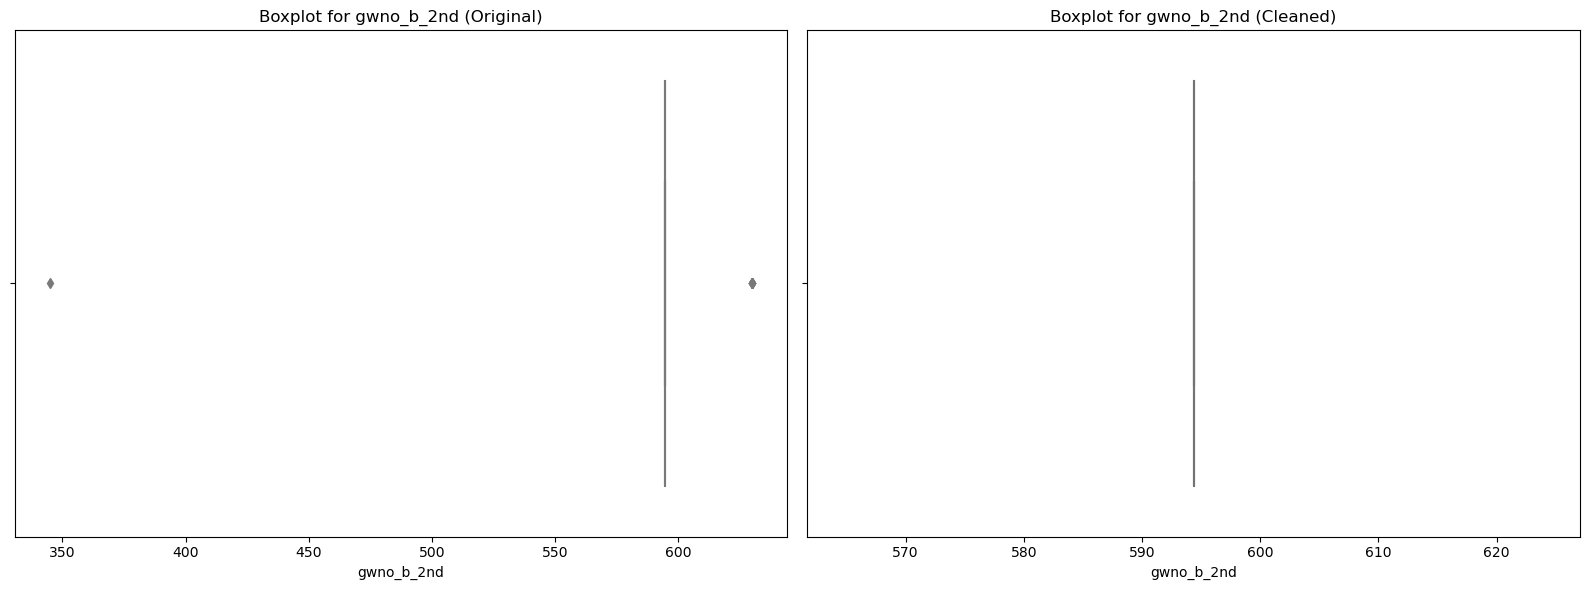

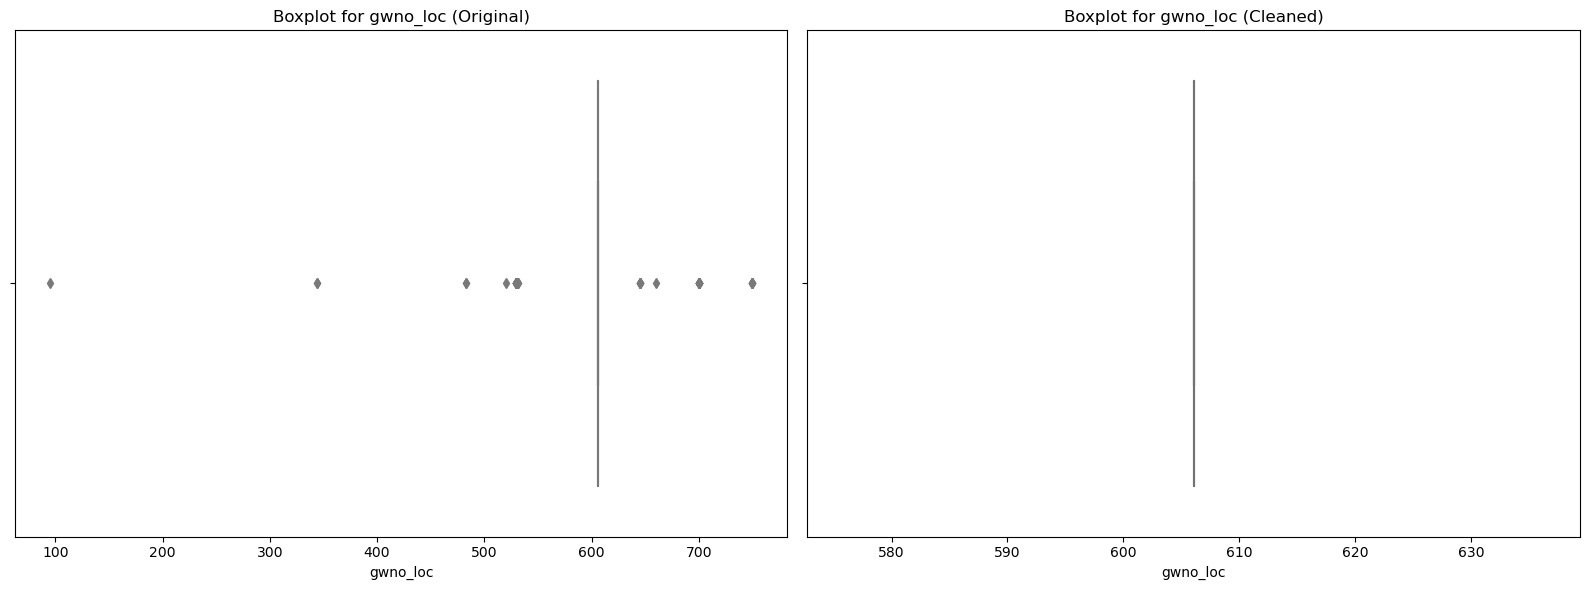

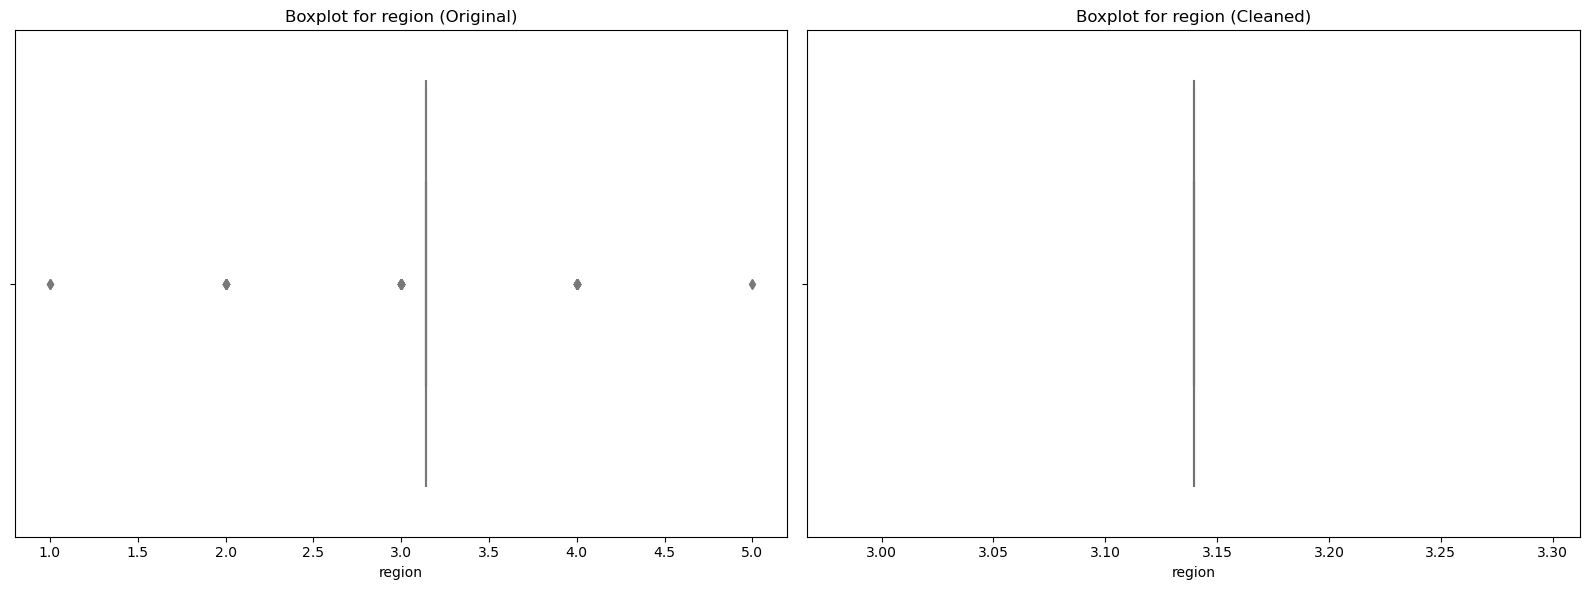

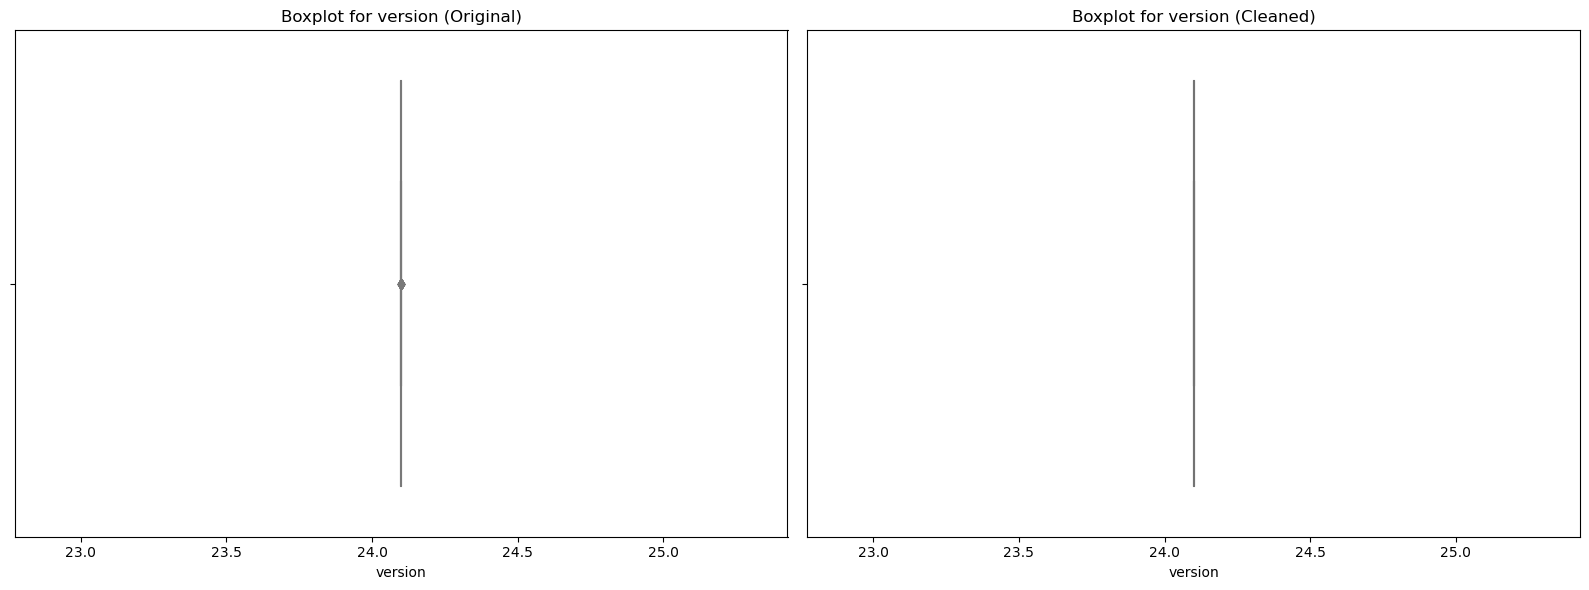

In [47]:
# Step 9: Verification - Overlay Boxplots for Comparison
def overlay_boxplots(df1, df2, columns):
    for column in columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Boxplot before cleaning
        sns.boxplot(x=df1[column], ax=axes[0], color='lightblue')
        axes[0].set_title(f'Boxplot for {column} (Original)')

        # Boxplot after cleaning
        sns.boxplot(x=df2[column], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot for {column} (Cleaned)')
        
        plt.tight_layout()
        plt.show()

# Overlay boxplots for comparison
overlay_boxplots(original_data, data, numerical_columns)

In [48]:
# Step 10: Verification - Check Remaining Outliers After Cleaning
def check_remaining_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Remaining Outliers in {column}: {len(remaining_outliers)}")

In [50]:

# Apply the function to each numerical column to check for remaining outliers
for col in numerical_columns:
    check_remaining_outliers(data, col)

# Step 11: Save the cleaned dataset to a new CSV file
cleaned_file_path = '/Users/claudiomema/Documents/College/Penn State/DAAN 881/war_territ_death_outliers_treated.csv'
data.to_csv(cleaned_file_path, index=False)


Remaining Outliers in Latitude: 0
Remaining Outliers in Longitude: 0
Remaining Outliers in Lehmann Zhukov Scale: 0
Remaining Outliers in Minor: 0
Remaining Outliers in year_x: 0
Remaining Outliers in conflict_id: 0
Remaining Outliers in side_a_id: 0
Remaining Outliers in incompatibility: 0
Remaining Outliers in year_y: 0
Remaining Outliers in bd_best: 0
Remaining Outliers in bd_low: 0
Remaining Outliers in bd_high: 0
Remaining Outliers in type_of_conflict: 0
Remaining Outliers in gwno_a: 0
Remaining Outliers in gwno_b: 0
Remaining Outliers in gwno_b_2nd: 0
Remaining Outliers in gwno_loc: 0
Remaining Outliers in region: 0
Remaining Outliers in version: 0
